In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape :", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (60000, 28, 28) (60000,)
Test shape : (10000, 28, 28) (10000,)


In [5]:
x_train = x_train.reshape(-1, 784) / 255.0
x_test  = x_test.reshape(-1, 784) / 255.0

print("After reshape train:", x_train.shape)
print("After reshape test :", x_test.shape)


After reshape train: (60000, 784)
After reshape test : (10000, 784)


In [6]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


C:\Users\nikhi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7497 - loss: 0.8438 - val_accuracy: 0.8988 - val_loss: 0.3757
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8853 - loss: 0.3961 - val_accuracy: 0.9137 - val_loss: 0.2968
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9010 - loss: 0.3371 - val_accuracy: 0.9258 - val_loss: 0.2499
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9133 - loss: 0.2971 - val_accuracy: 0.9323 - val_loss: 0.2289
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9225 - loss: 0.2657 - val_accuracy: 0.9433 - val_loss: 0.2007
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9297 - loss: 0.2387 - val_accuracy: 0.9463 - val_loss: 0.1877
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9369 - loss: 0.2166 - val_accuracy: 0.9562 - val_loss: 0.1637
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9431 - loss: 0.1953 - 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9531 - loss: 0.1581
Test Loss: 0.1580774039030075
Test Accuracy: 0.9531000256538391


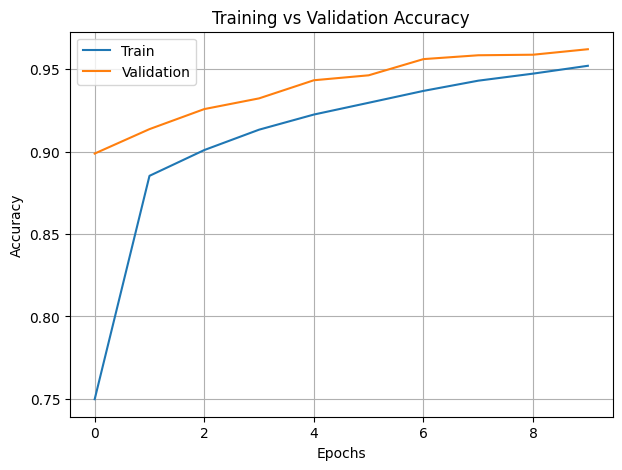

In [10]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()


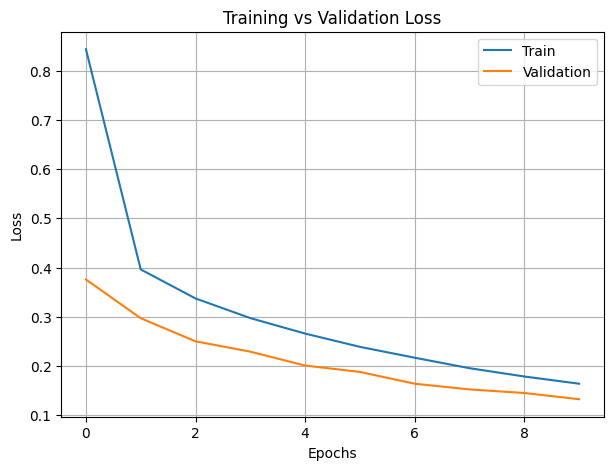

In [11]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()


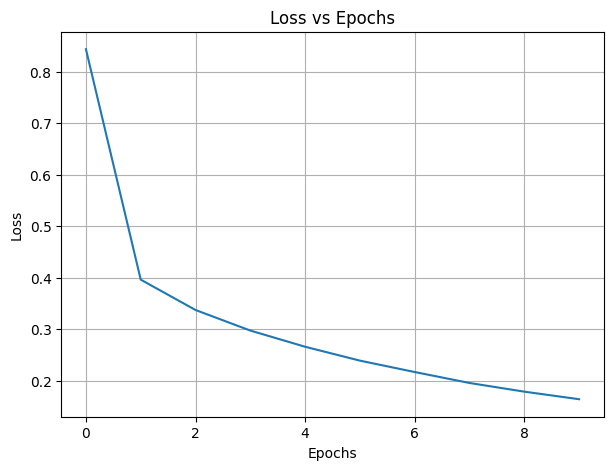

In [12]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()


In [13]:
print("OBSERVATIONS:")
print("1. Model achieved good accuracy (normally 97% - 98%).")
print("2. Validation accuracy increases and stabilizes after some epochs.")
print("3. If training accuracy increases but validation accuracy stops, overfitting may occur.")
print("4. Increasing epochs beyond 10 may not improve much.")
print("5. Hidden layers improve learning but increase computation time.")


OBSERVATIONS:
1. Model achieved good accuracy (normally 97% - 98%).
2. Validation accuracy increases and stabilizes after some epochs.
3. If training accuracy increases but validation accuracy stops, overfitting may occur.
4. Increasing epochs beyond 10 may not improve much.
5. Hidden layers improve learning but increase computation time.
